# Import Libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


# Import Data

In [142]:
df = pd.read_csv('MavenRail.csv')
df

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00,2024-04-30 20:30,2024-04-30 20:30,On Time,NaN,No
31641,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15,2024-04-30 21:35,2024-04-30 21:35,On Time,NaN,No
31642,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15,2024-04-30 20:45,2024-04-30 20:45,On Time,NaN,No
31643,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15,2024-04-30 22:35,2024-04-30 22:35,On Time,NaN,No


# Cleaning Data

In [144]:
df.duplicated().sum()

5631

I found 5,631 duplicate rows in the data.

In [146]:
df = df.drop_duplicates()
df

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00,2024-04-30 20:30,2024-04-30 20:30,On Time,NaN,No
31641,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15,2024-04-30 21:35,2024-04-30 21:35,On Time,NaN,No
31642,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15,2024-04-30 20:45,2024-04-30 20:45,On Time,NaN,No
31643,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15,2024-04-30 22:35,2024-04-30 22:35,On Time,NaN,No


In [147]:
df.isnull().sum()

Payment.Method           0
Railcard             17154
Ticket.Class             0
Ticket.Type              0
Price                    0
Departure.Station        0
Arrival.Station          0
Departure                3
Scheduled.Arrival        4
Actual.Arrival        1453
Journey.Status           0
Reason.for.Delay     22993
Refund.Request           0
dtype: int64

Rows with Railcard = NaN indicate people who do not use a Railcard.
Additionally, I discovered missing values in several columns: Scheduled.Arrival, Actual.Arrival, and Reason.for.Delay.

In [149]:
scheduled_departure_nan = df[df['Scheduled.Arrival'].isna() | df['Departure'].isna()]
scheduled_departure_nan

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
23609,Credit Card,NaN,Standard,Advance,37,London Euston,York,2024-03-31 00:00,NaN,2024-03-31 02:46,Delayed,Signal Failure,No
23613,Credit Card,NaN,First Class,Advance,10,Liverpool Lime Street,Manchester Piccadilly,NaN,NaN,NaN,On Time,NaN,No
23614,Contactless,Disabled,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,NaN,2024-03-31 02:00,2024-03-31 02:00,On Time,NaN,No
23616,Contactless,Adult,Standard,Off-Peak,24,York,Edinburgh,2024-03-31 22:30,NaN,NaN,On Time,NaN,No
23618,Contactless,NaN,Standard,Off-Peak,11,York,Durham,NaN,2024-03-31 02:35,2024-03-31 02:35,On Time,NaN,No
23624,Credit Card,NaN,Standard,Off-Peak,113,Liverpool Lime Street,London Euston,2024-03-31 23:30,NaN,NaN,On Time,NaN,No


I removed only the last five rows, as the first one still contains meaningful information, while the others either lack a departure time or an arrival time.

In [151]:
rows = [23613, 23614, 23616, 23618, 23624]
df = df.drop(index=rows)

In [152]:
df

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00,2024-01-01 13:30,2024-01-01 13:30,On Time,NaN,No
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45,2024-01-01 11:35,2024-01-01 11:40,Delayed,Signal Failure,No
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15,2024-01-02 18:45,2024-01-02 18:45,On Time,NaN,No
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30,2024-01-01 22:30,2024-01-01 22:30,On Time,NaN,No
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45,2024-01-01 19:00,2024-01-01 19:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00,2024-04-30 20:30,2024-04-30 20:30,On Time,NaN,No
31641,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15,2024-04-30 21:35,2024-04-30 21:35,On Time,NaN,No
31642,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15,2024-04-30 20:45,2024-04-30 20:45,On Time,NaN,No
31643,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15,2024-04-30 22:35,2024-04-30 22:35,On Time,NaN,No


# EDA

In [154]:
df['Railcard'].value_counts()

Railcard
Adult       4175
Disabled    2515
Senior      2168
Name: count, dtype: int64

In [155]:
categorical_columns = df.select_dtypes(include=['object']).columns
excluded_columns = ['Departure', 'Scheduled.Arrival', 'Actual.Arrival']
categorical_columns = [col for col in categorical_columns if col not in excluded_columns]

for col in categorical_columns:
    print(f"Unique values for {col}:")
    print(df[col].value_counts(normalize=True))
    print("\n")

Unique values for Payment.Method:
Payment.Method
Credit Card    0.583029
Contactless    0.364758
Debit Card     0.052213
Name: proportion, dtype: float64


Unique values for Railcard:
Railcard
Adult       0.471325
Disabled    0.283924
Senior      0.244751
Name: proportion, dtype: float64


Unique values for Ticket.Class:
Ticket.Class
Standard       0.886039
First Class    0.113961
Name: proportion, dtype: float64


Unique values for Ticket.Type:
Ticket.Type
Advance     0.552578
Off-Peak    0.292668
Anytime     0.154754
Name: proportion, dtype: float64


Unique values for Departure.Station:
Departure.Station
Manchester Piccadilly    0.176785
London Euston            0.162098
Liverpool Lime Street    0.142374
London Paddington        0.137299
London Kings Cross       0.135761
London St Pancras        0.119689
Birmingham New Street    0.066746
York                     0.031182
Reading                  0.020339
Oxford                   0.005306
Edinburgh Waverley       0.001807
Bristol Tem

The values above are normalized values, not counts, for each categorical column, except for Departure, Scheduled.Arrival, and Actual.Arrival.

In [157]:
df['Price'].describe()

count    26009.000000
mean        22.996155
std         29.077144
min          1.000000
25%          5.000000
50%         11.000000
75%         35.000000
max        267.000000
Name: Price, dtype: float64

The Price column, which is the only numerical column, has an average price of about 23. Prices range from 1 to 267, with half of the prices being 11 or lower, and most prices (75%) being 35 or lower.

# Univariate Analysis

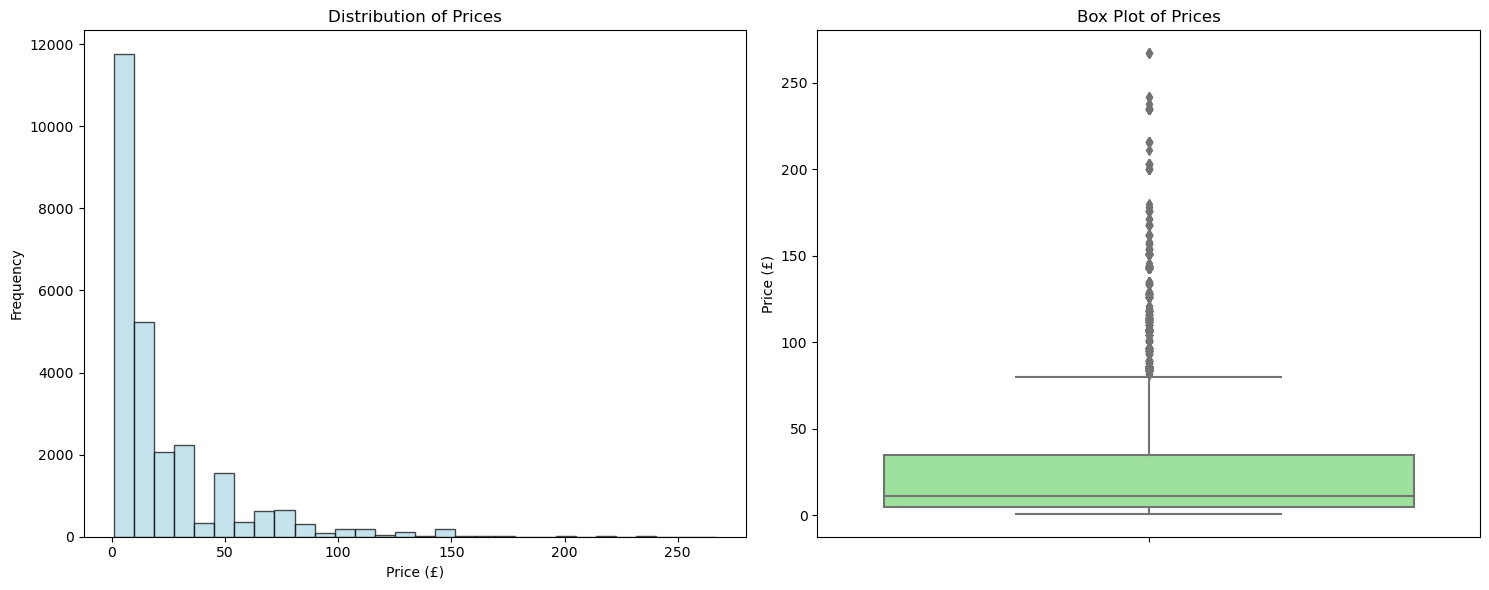

In [160]:
plt.figure(figsize=(15, 6))

#Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Price'].dropna(), bins=30, edgecolor='k', alpha=0.7, color='lightblue')
plt.title('Distribution of Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y='Price', data=df, color='lightgreen')
plt.title('Box Plot of Prices')
plt.ylabel('Price (£)')

plt.tight_layout()
plt.show()

The histogram on the left shows that most ticket prices are low, with a large number of tickets priced below £50. The box plot on the right reveals that while most prices fall within a lower range, there are several high-priced outliers extending up to around £267.

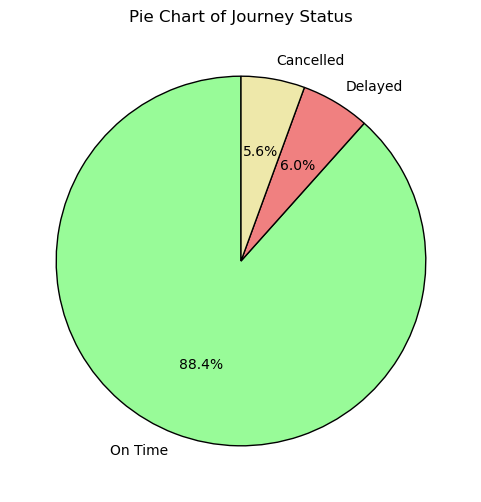

In [162]:
plt.figure(figsize=(6, 6))
colors = ['palegreen', 'lightcoral', 'palegoldenrod']  # pastel colors for 'On Time', 'Cancelled', 'Delayed'
df['Journey.Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Pie Chart of Journey Status')
plt.ylabel('')
plt.show()

The pie chart shows that most journeys (88.4%) are on time, while 6.0% are delayed and 5.6% are canceled.

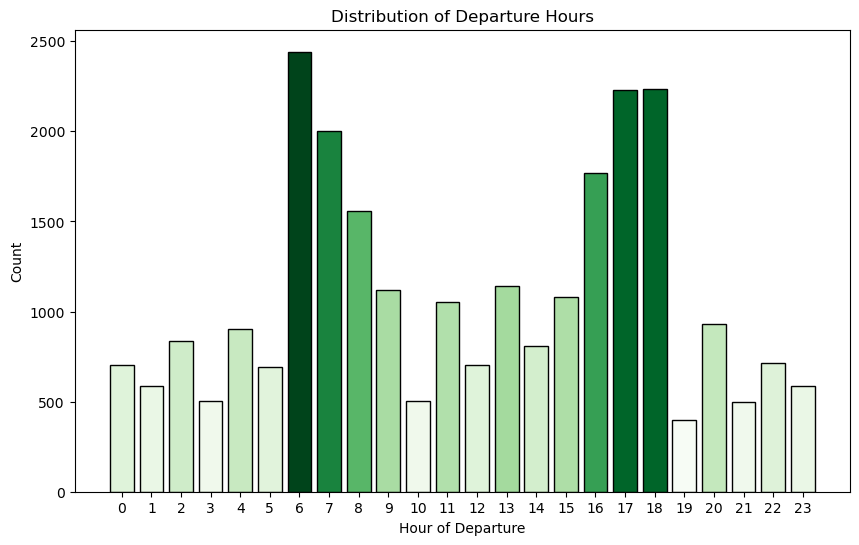

In [164]:
df['Departure'] = pd.to_datetime(df['Departure'], errors='coerce')

df['Departure.Hour'] = df['Departure'].dt.hour


import matplotlib.cm as cm

# Data for plotting
hour_counts = df['Departure.Hour'].value_counts().sort_index()

# Normalize the counts to create a gradient effect
norm = plt.Normalize(vmin=hour_counts.min(), vmax=hour_counts.max())
colors = cm.Greens(norm(hour_counts.values))

# Plotting the distribution of 'Departure.Hour' with a gradient color
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color=colors, edgecolor='black')
plt.title('Distribution of Departure Hours')
plt.xlabel('Hour of Departure')
plt.ylabel('Count')
plt.xticks(np.arange(0, 24, step=1), rotation=0)
plt.show()


The chart shows that departure times peak around 6-8 AM and 4-7 PM, possibly due to typical commuting times.

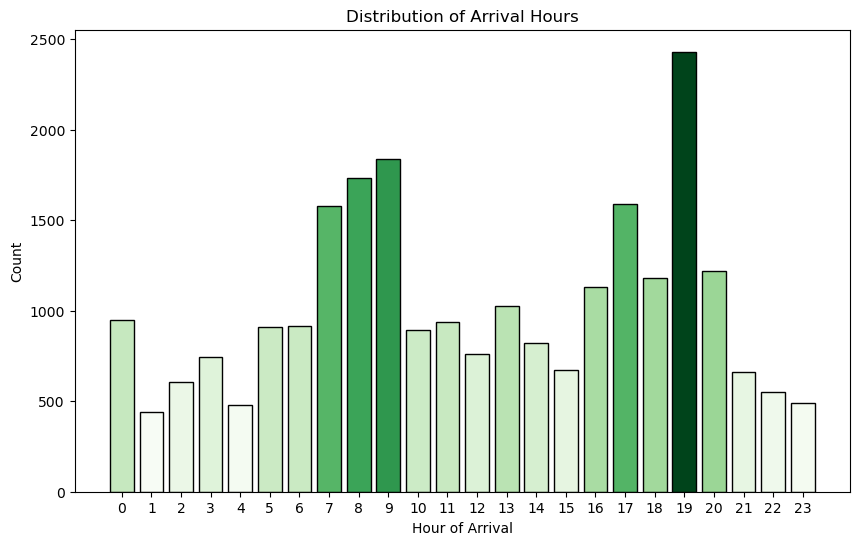

In [166]:
df['Actual.Arrival'] = pd.to_datetime(df['Actual.Arrival'], errors='coerce')

df['Actual.Arrival.Hour'] = df['Actual.Arrival'].dt.hour


import matplotlib.cm as cm

# Data for plotting
hour_counts = df['Actual.Arrival.Hour'].value_counts().sort_index()

# Normalize the counts to create a gradient effect
norm = plt.Normalize(vmin=hour_counts.min(), vmax=hour_counts.max())
colors = cm.Greens(norm(hour_counts.values))

# Plotting the distribution of 'Departure.Hour' with a gradient color
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color=colors, edgecolor='black')
plt.title('Distribution of Arrival Hours')
plt.xlabel('Hour of Arrival')
plt.ylabel('Count')
plt.xticks(np.arange(0, 24, step=1), rotation=0)
plt.show()


# Bivariate Analysis

<Figure size 1600x600 with 0 Axes>

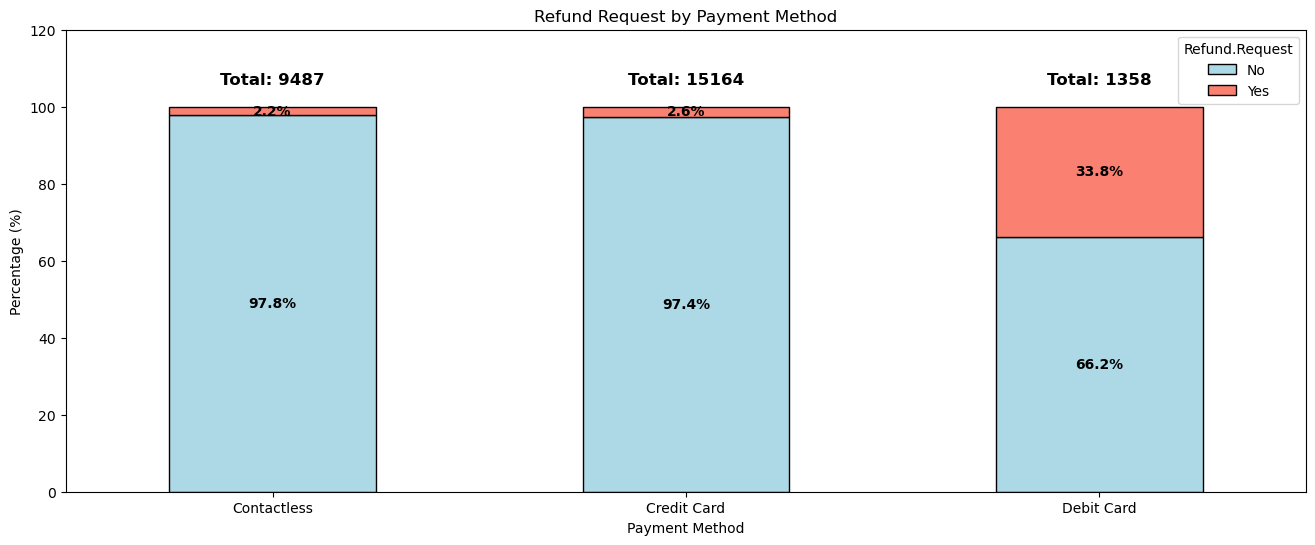

In [168]:
#Refund Request by Payment Method
ct_percent = pd.crosstab(df['Payment.Method'], df['Refund.Request'], normalize='index') * 100
ct_count = pd.crosstab(df['Payment.Method'], df['Refund.Request'])

plt.figure(figsize=(16, 6))

ax = ct_percent.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(16, 6), edgecolor='black')
plt.title('Refund Request by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Add a condition to only display labels if the height is greater than zero
        ax.text(x + width / 2, 
                y + height / 2, 
                f'{height:.1f}%', 
                ha='center', 
                va='center', 
                fontsize=10, 
                fontweight='bold')

total_count = ct_count.sum(axis=1)
for idx, count in enumerate(total_count):
    ax.text(idx, 105, f'Total: {count}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.ylim(0, 120)
plt.show()


The chart shows that most transactions across all payment methods do not involve a refund request. However, a relatively high percentage (33.8%) of debit card transactions include refund requests. Among the payment methods, credit cards are the most commonly used, accounting for 15,164 journeys.

Crosstab of Railcard, Ticket Class, and Ticket Type:
Ticket.Type            Advance  Anytime  Off-Peak
Railcard Ticket.Class                            
Adult    First Class       285       81       115
         Standard         2027      584      1083
Disabled First Class       166       53        83
         Standard         1190      378       645
Senior   First Class       164       52        43
         Standard         1031      401       477


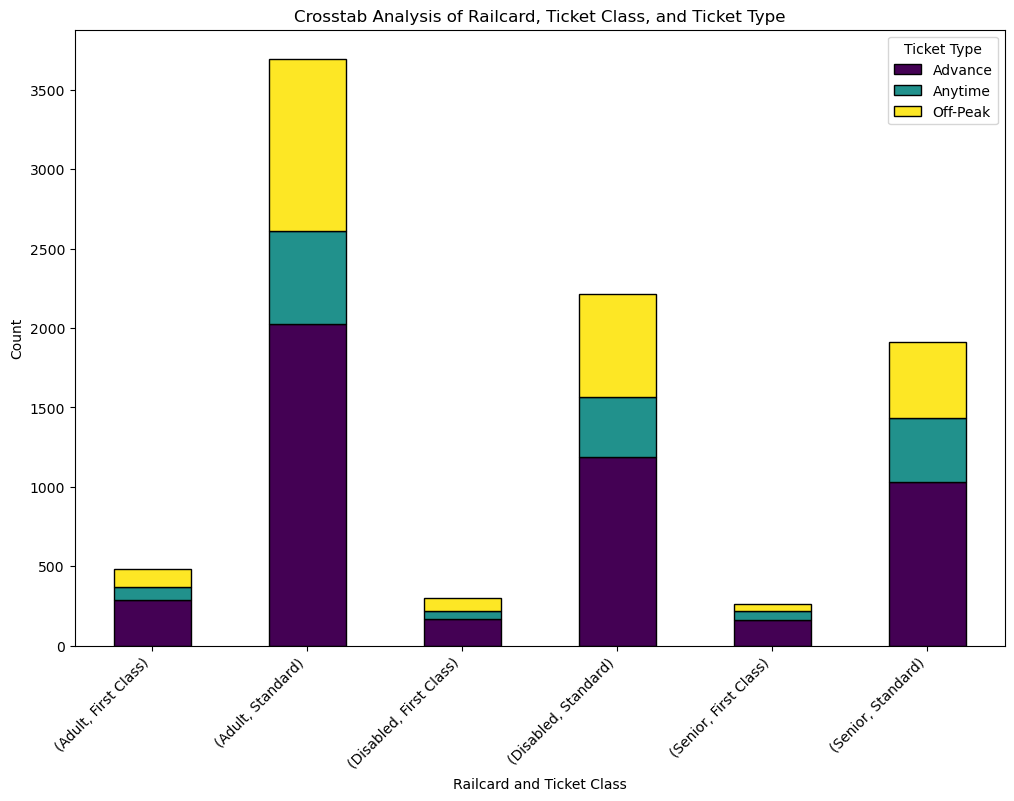

In [170]:
#Railcard vs Ticket Class vs Ticket Type
ct_result = pd.crosstab([df['Railcard'], df['Ticket.Class']], df['Ticket.Type'])

# Print the crosstab result
print("Crosstab of Railcard, Ticket Class, and Ticket Type:")
print(ct_result)

# Visualization: Stacked Bar Chart of Crosstab
ct_result.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title('Crosstab Analysis of Railcard, Ticket Class, and Ticket Type')
plt.xlabel('Railcard and Ticket Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ticket Type')
plt.show()


The chart shows that most tickets are purchased in the Standard class, especially for Adult Railcard holders. Among ticket types, "Anytime" tickets are the most common, followed by "Off-Peak" tickets, with "Advance" tickets being the least common across all groups.

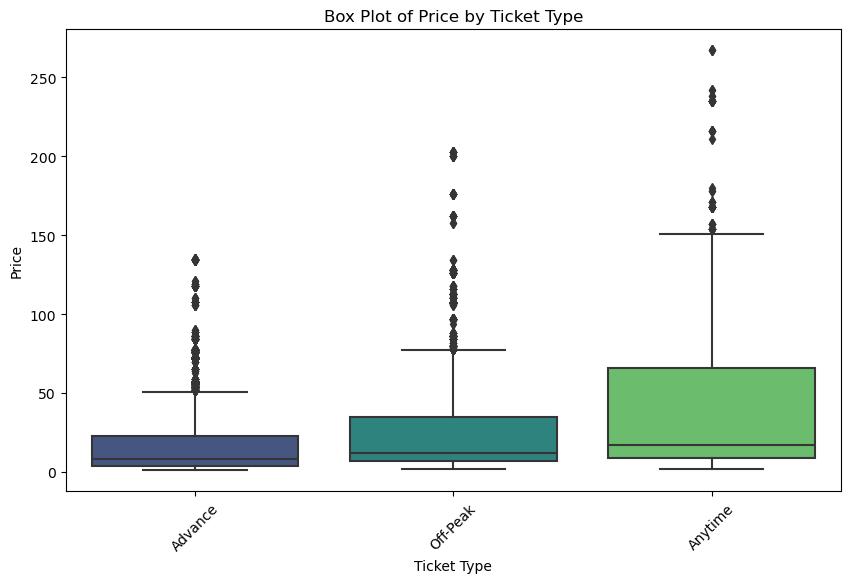

In [172]:
#Ticket Type vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ticket.Type', y='Price', data=df, palette='viridis')
plt.title('Box Plot of Price by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

The box plot shows that "Anytime" tickets have the highest price range, followed by "Off-Peak" tickets, while "Advance" tickets generally have the lowest prices. Each ticket type has a number of outliers, with "Anytime" tickets having the most extreme outliers.

# Convert Scheduled and Actual Arrival

In [175]:
# Convert Scheduled and Actual Arrival to datetime without specifying a format
df['Scheduled.Arrival.Datetime'] = pd.to_datetime(df['Scheduled.Arrival'])
df['Actual.Arrival.Datetime'] = pd.to_datetime(df['Actual.Arrival'])

# Calculate DelayInMinutes
df['DelayInMinutes'] = (df['Actual.Arrival.Datetime'] - df['Scheduled.Arrival.Datetime']).dt.total_seconds() / 60

# Set DelayInMinutes to None for journeys that are "On Time"
df.loc[df['Journey.Status'] == 'On Time', 'DelayInMinutes'] = None

In [176]:
df

,Payment.Method,Railcard,Ticket.Class,Ticket.Type,Price,Departure.Station,Arrival.Station,Departure,Scheduled.Arrival,Actual.Arrival,Journey.Status,Reason.for.Delay,Refund.Request,Departure.Hour,Actual.Arrival.Hour,Scheduled.Arrival.Datetime,Actual.Arrival.Datetime,DelayInMinutes
0,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01 11:00:00,2024-01-01 13:30,2024-01-01 13:30:00,On Time,NaN,No,11,13.0,2024-01-01 13:30:00,2024-01-01 13:30:00,NaN
1,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01 09:45:00,2024-01-01 11:35,2024-01-01 11:40:00,Delayed,Signal Failure,No,9,11.0,2024-01-01 11:35:00,2024-01-01 11:40:00,5.0
2,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02 18:15:00,2024-01-02 18:45,2024-01-02 18:45:00,On Time,NaN,No,18,18.0,2024-01-02 18:45:00,2024-01-02 18:45:00,NaN
3,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01 21:30:00,2024-01-01 22:30,2024-01-01 22:30:00,On Time,NaN,No,21,22.0,2024-01-01 22:30:00,2024-01-01 22:30:00,NaN
4,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01 16:45:00,2024-01-01 19:00,2024-01-01 19:00:00,On Time,NaN,No,16,19.0,2024-01-01 19:00:00,2024-01-01 19:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:00:00,2024-04-30 20:30,2024-04-30 20:30:00,On Time,NaN,No,20,20.0,2024-04-30 20:30:00,2024-04-30 20:30:00,NaN
31641,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 20:15:00,2024-04-30 21:35,2024-04-30 21:35:00,On Time,NaN,No,20,21.0,2024-04-30 21:35:00,2024-04-30 21:35:00,NaN
31642,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30 20:15:00,2024-04-30 20:45,2024-04-30 20:45:00,On Time,NaN,No,20,20.0,2024-04-30 20:45:00,2024-04-30 20:45:00,NaN
31643,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30 21:15:00,2024-04-30 22:35,2024-04-30 22:35:00,On Time,NaN,No,21,22.0,2024-04-30 22:35:00,2024-04-30 22:35:00,NaN


# Predicting Refund Requests Based on a Certain Price Range

In [178]:
# Filter for delayed journeys
df_delay = df[df['Journey.Status'] != 'On Time']

# Create MediumPrice column
df_delay['MediumPrice'] = df_delay['Price'].apply(lambda x: 10 < x <= 30)

/var/folders/hf/087y7vws1m36kb0_23vh6wq00000gn/T/ipykernel_1579/1497967474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['MediumPrice'] = df_delay['Price'].apply(lambda x: 10 < x <= 30)


In [179]:
X = df_delay[['MediumPrice']].astype(int)  # Convert boolean to int for regression
y = df_delay['Refund.Request'].map({'Yes': 1, 'No': 0})  # Encode Yes as 1, No as 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Accuracy: 0.6363636363636364
ROC AUC Score: 0.5081168831168831


The logistic regression model was trained to predict whether a delayed journey will result in a refund request based on whether the ticket price falls within a medium price range (£10 to £30). The model achieved an accuracy of approximately 63.6% and an ROC AUC score of 50.8%, indicating that it performs slightly better than random guessing.

In [181]:
import numpy as np

#Function to calculate refund probability
def refund_probability(price):
    medium_price = int(10 < price <= 30)
    return log_reg.predict_proba([[medium_price]])[0][1]

#Probability for £5 and £25 tickets
print("Refund probability for £5 ticket:", refund_probability(5))
print("Refund probability for £25 ticket:", refund_probability(25))

Refund probability for £5 ticket: 0.3362285811503023
Refund probability for £25 ticket: 0.4109745816431514


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [182]:
# Retrieve the coefficients and intercept from the trained logistic regression model
coef = log_reg.coef_[0][0]
intercept = log_reg.intercept_[0]

# Create the logistic regression model equation
print(f"Logistic Regression Model Equation: log_odds = {intercept:.4f} + ({coef:.4f} * MediumPrice)")

Logistic Regression Model Equation: log_odds = -0.6801 + (0.3202 * MediumPrice)


The function estimates the probability of a refund request for specific ticket prices. For a £5 ticket, the probability of a refund request is approximately 33.6%, and for a £25 ticket, it is around 41.1%. These probabilities suggest that higher prices within the medium range may increase the likelihood of refund requests.

# Feature Selection

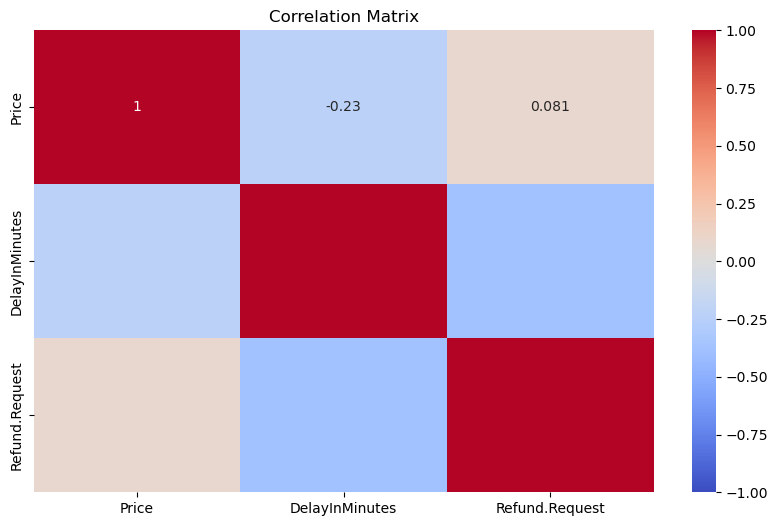

Refund.Request    1.000000
Price             0.080507
DelayInMinutes   -0.378265
Name: Refund.Request, dtype: float64


In [187]:
# Convert 'Refund.Request' to numeric
df['Refund.Request'] = df['Refund.Request'].map({'No': 0, 'Yes': 1})

# Calculate correlation matrix
correlation_matrix = df[['Price', 'DelayInMinutes', 'Refund.Request']].corr()

# Plot heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Check specific correlation with Refund.Request
print(correlation_matrix['Refund.Request'].sort_values(ascending=False))

I calculate the correlation matrix to examine relationships between numeric features and the target variable, Refund.Request. The matrix revealed that Price and DelayInMinutes have weak correlations with Refund.Request, suggesting these features alone might have limited predictive power.
 
Therefore, I continue with other feature selection method.

In [189]:
df['Departure.Datetime'] = pd.to_datetime(df['Departure'])

In [190]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical columns excluding the target column 'Refund.Request'
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'Refund.Request']

# Run Chi-Square test for each categorical feature
chi_square_results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Refund.Request'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = {'Chi2': chi2, 'p-value': p}

# Display the results
for feature, results in chi_square_results.items():
    print(f"Chi-Square Test for {feature}:")
    print(f"  Chi2: {results['Chi2']}, p-value: {results['p-value']}\n")


Chi-Square Test for Payment.Method:
  Chi2: 3214.494136150002, p-value: 0.0

Chi-Square Test for Railcard:
  Chi2: 125.24325018718552, p-value: 6.364638976180332e-28

Chi-Square Test for Ticket.Class:
  Chi2: 0.6343831008670314, p-value: 0.42575210708133293

Chi-Square Test for Ticket.Type:
  Chi2: 12.810288074645928, p-value: 0.0016530321062337278

Chi-Square Test for Departure.Station:
  Chi2: 1428.3887882065585, p-value: 9.023479325119002e-300

Chi-Square Test for Arrival.Station:
  Chi2: 2068.544696893217, p-value: 0.0

Chi-Square Test for Scheduled.Arrival:
  Chi2: 13527.353061813397, p-value: 0.9914321678997835

Chi-Square Test for Journey.Status:
  Chi2: 8571.782897615074, p-value: 0.0

Chi-Square Test for Reason.for.Delay:
  Chi2: 387.6629728368818, p-value: 1.3517980902075791e-81



I perform Chi-square tests on each categorical feature to assess their association with Refund.Request. Significant associations (p-value < 0.05) were found for most features, including Payment.Method, Railcard, Ticket.Type, and Journey.Status. However, features like Ticket.Class and Scheduled.Arrival showed no significant relationship, indicating they might be less useful for prediction.

In [192]:
from sklearn.ensemble import RandomForestClassifier

# Select the features to encode
df_to_encode = df[['Price', 'Payment.Method', 'Railcard', 'Ticket.Class', 'Ticket.Type', 
    'Journey.Status', 'Reason.for.Delay', 'Departure.Station', 'Arrival.Station']]

# One-hot encode all categorical variables
df_encoded = pd.get_dummies(df_to_encode, columns=[
    'Payment.Method', 'Railcard', 'Ticket.Class', 'Ticket.Type', 
    'Journey.Status', 'Reason.for.Delay', 'Departure.Station', 'Arrival.Station'
], drop_first=True)

# Define the target variable
y = df['Refund.Request']  # Access 'Refund.Request' directly from the original df

# Define the feature set including both encoded categorical and numeric variables
X = df_encoded.fillna(0)  # Fill NaNs for numeric compatibility

# Train a RandomForest model
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(forest_clf.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

Feature Importances:
Journey.Status_On Time                     2.202190e-01
Payment.Method_Debit Card                  9.746496e-02
Reason.for.Delay_Technical Issue           9.680570e-02
Journey.Status_Delayed                     8.319026e-02
Price                                      8.004015e-02
Payment.Method_Credit Card                 4.797685e-02
Reason.for.Delay_Staffing                  4.174381e-02
Reason.for.Delay_Weather                   3.750805e-02
Arrival.Station_London Euston              3.181530e-02
Reason.for.Delay_Traffic                   2.914848e-02
Arrival.Station_Manchester Piccadilly      1.989949e-02
Reason.for.Delay_Staff                     1.926446e-02
Ticket.Type_Off-Peak                       1.799687e-02
Departure.Station_Liverpool Lime Street    1.541339e-02
Railcard_Senior                            1.494176e-02
Departure.Station_London Euston            1.371070e-02
Ticket.Type_Anytime                        1.354841e-02
Railcard_Disabled          

Using a Random Forest classifier, I identified the most important features for predicting Refund.Request. Key features included Journey.Status, Payment.Method, and various reasons for delay. This analysis helped highlight which features contribute the most to the model's predictions.

Final Recommendations:
    
Include Journey.Status, Payment.Method, Reason.for.Delay, and Ticket.Type as key features. Additionally, I will check if Departure.Station and Arrival.Station can serve as good predictors, as they showed importance in both the Chi-square tests and feature importance analysis. I will also assess whether Price is indeed a poor predictor.

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Load the datasets
df = pd.read_csv('MavenRail.csv')

# Drop duplicates and specific rows
df = df.drop_duplicates()
rows = [23613, 23614, 23616, 23618, 23624]
df = df.drop(index=rows)

# Drop rows where the target variable 'Refund.Request' is NaN
df = df.dropna(subset=['Refund.Request'])

# Map categorical values to numerical for model compatibility
df['Journey.Status'] = df['Journey.Status'].map({'On Time': 1, 'Delayed': 0})
df['Payment.Method'] = df['Payment.Method'].map({'Debit Card': 1, 'Credit Card': 0})
df['Reason.for.Delay'] = df['Reason.for.Delay'].apply(lambda x: 1 if x == 'Technical Issue' else 0)
df['Ticket.Type'] = df['Ticket.Type'].map({'Advance': 0, 'Off-Peak': 1, 'Anytime': 2})

# Encode Departure and Arrival Stations using one-hot encoding
df = pd.get_dummies(df, columns=['Departure.Station', 'Arrival.Station'], drop_first=True)

# Fill missing values in the 'Price' column
df['Price'] = df['Price'].fillna(0)

# Define different feature sets
feature_sets = {
    "Key Features": ['Journey.Status', 'Payment.Method', 'Reason.for.Delay', 'Ticket.Type'],
    "With Stations": ['Journey.Status', 'Payment.Method', 'Reason.for.Delay', 'Ticket.Type'] + \
                     [col for col in df.columns if 'Departure.Station_' in col or 'Arrival.Station_' in col],
    "Only Price": ['Price'],
    "Only Stations": [col for col in df.columns if 'Departure.Station_' in col or 'Arrival.Station_' in col]
}

# Loop through each feature set and evaluate Logistic Regression performance
for feature_set_name, features in feature_sets.items():
    # Define features and target
    X = df[features]
    y = df['Refund.Request'].map({'Yes': 1, 'No': 0})

    # Impute missing values in X
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Predict and calculate metrics
    y_train_pred = log_reg.predict(X_train)
    y_test_pred = log_reg.predict(X_test)

    # Training Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, log_reg.predict_proba(X_train)[:, 1])
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Test Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print the results for the current feature set
    print(f"Logistic Regression - {feature_set_name}:")
    print("  Training Accuracy:", train_accuracy)
    print("  Training ROC AUC:", train_roc_auc)
    print("  Training Precision:", train_precision)
    print("  Training Recall:", train_recall)
    print("  Training F1 Score:", train_f1)
    print("  Test Accuracy:", test_accuracy)
    print("  Test ROC AUC:", test_roc_auc)
    print("  Test Precision:", test_precision)
    print("  Test Recall:", test_recall)
    print("  Test F1 Score:", test_f1)
    print("-" * 50)


Logistic Regression - Key Features:
  Training Accuracy: 0.9661171721055414
  Training ROC AUC: 0.8658253297767478
  Training Precision: 0.7264150943396226
  Training Recall: 0.27208480565371024
  Training F1 Score: 0.39588688946015427
  Test Accuracy: 0.9640522875816994
  Test ROC AUC: 0.889361553300838
  Test Precision: 0.7012987012987013
  Test Recall: 0.24770642201834864
  Test F1 Score: 0.36610169491525424
--------------------------------------------------
Logistic Regression - With Stations:
  Training Accuracy: 0.9711154899793338
  Training ROC AUC: 0.8137261393803312
  Training Precision: 0.8647058823529412
  Training Recall: 0.3462897526501767
  Training F1 Score: 0.4945332211942809
  Test Accuracy: 0.9694348327566321
  Test ROC AUC: 0.8281882758773029
  Test Precision: 0.8554216867469879
  Test Recall: 0.3256880733944954
  Test F1 Score: 0.4717607973421927
--------------------------------------------------


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression - Only Price:
  Training Accuracy: 0.9591964242802903
  Training ROC AUC: 0.5884201935961868
  Training Precision: 0.0
  Training Recall: 0.0
  Training F1 Score: 0.0
  Test Accuracy: 0.9580930411380238
  Test ROC AUC: 0.6120700921848999
  Test Precision: 0.0
  Test Recall: 0.0
  Test F1 Score: 0.0
--------------------------------------------------
Logistic Regression - Only Stations:
  Training Accuracy: 0.961022732734176
  Training ROC AUC: 0.7175272135087924
  Training Precision: 1.0
  Training Recall: 0.0447585394581861
  Training F1 Score: 0.08568207440811725
  Test Accuracy: 0.9598231449442522
  Test ROC AUC: 0.7076967396586509
  Test Precision: 1.0
  Test Recall: 0.04128440366972477
  Test F1 Score: 0.07929515418502203
--------------------------------------------------


Logistic Regression – Key Features: Using the selected key features (Journey.Status, Payment.Method, Reason.for.Delay, Ticket.Type), the model achieved high accuracy on both training and test sets (96.6% and 96.4%, respectively). The test ROC AUC score was 0.89, indicating good discriminatory power. However, recall is low (27.2% on training and 24.7% on test), which suggests that the model struggles to identify all refund requests.

Logistic Regression – With Stations: When including Departure.Station and Arrival.Station, the model’s accuracy improved slightly (96.9% on test). However, the ROC AUC score dropped to 0.83, suggesting that adding station information did not significantly enhance the model's predictive performance. Precision increased, but recall remains low.

Logistic Regression – Only Price: Using only Price as a feature, the model achieved an accuracy of 95.8% but with very low ROC AUC (0.61). Precision, recall, and F1 scores are zero, indicating that Price alone is a poor predictor of refund requests, as it fails to identify any positive cases.

Logistic Regression – Only Stations: Using only Departure.Station and Arrival.Station as predictors, the model achieved similar accuracy (95.9%) and moderate ROC AUC (0.71). The precision was high, but the recall was extremely low (4.1% on the test set), suggesting that station information alone is insufficient to capture the refund request patterns.

Now I'm going to use the "With Stations" features and experiment with different test sizes to determine which one performs the best.

# Hyperparameter Tuning

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Load the datasets
df = pd.read_csv('MavenRail.csv')

# Drop duplicates and specific rows
df = df.drop_duplicates()
rows = [23613, 23614, 23616, 23618, 23624]
df = df.drop(index=rows)

# Drop rows where the target variable 'Refund.Request' is NaN
df = df.dropna(subset=['Refund.Request'])

# Map categorical values to numerical for model compatibility
df['Journey.Status'] = df['Journey.Status'].map({'On Time': 1, 'Delayed': 0})
df['Payment.Method'] = df['Payment.Method'].map({'Debit Card': 1, 'Credit Card': 0})
df['Reason.for.Delay'] = df['Reason.for.Delay'].apply(lambda x: 1 if x == 'Technical Issue' else 0)
df['Ticket.Type'] = df['Ticket.Type'].map({'Advance': 0, 'Off-Peak': 1, 'Anytime': 2})

# One-hot encode Departure.Station and Arrival.Station
df = pd.get_dummies(df, columns=['Departure.Station', 'Arrival.Station'], drop_first=True)

# Define features and target, including one-hot encoded station columns
features = ['Journey.Status', 'Payment.Method', 'Reason.for.Delay', 'Ticket.Type'] + \
           [col for col in df.columns if 'Departure.Station_' in col or 'Arrival.Station_' in col]
X = df[features]
y = df['Refund.Request'].map({'Yes': 1, 'No': 0})

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# List of test sizes to evaluate
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# Iterate through each test size, split the data, train the model, and evaluate metrics
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Train Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Predictions
    y_pred_log = log_reg.predict(X_test)

    # Calculate accuracy and ROC AUC score
    log_accuracy = accuracy_score(y_test, y_pred_log)
    log_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

    # Calculate additional metrics: precision, recall, and F1 score
    log_precision = precision_score(y_test, y_pred_log)
    log_recall = recall_score(y_test, y_pred_log)
    log_f1 = f1_score(y_test, y_pred_log)

    # Print the results
    print(f"Test Size: {test_size}")
    print("  Logistic Regression - Accuracy:", log_accuracy)
    print("  Logistic Regression - ROC AUC Score:", log_roc_auc)
    print("  Logistic Regression - Precision:", log_precision)
    print("  Logistic Regression - Recall:", log_recall)
    print("  Logistic Regression - F1 Score:", log_f1)
    print("-" * 50)

Test Size: 0.1
  Logistic Regression - Accuracy: 0.968473663975394
  Logistic Regression - ROC AUC Score: 0.8415338708653419
  Logistic Regression - Precision: 0.9444444444444444
  Logistic Regression - Recall: 0.2982456140350877
  Logistic Regression - F1 Score: 0.4533333333333333
--------------------------------------------------
Test Size: 0.15
  Logistic Regression - Accuracy: 0.9710404920553563
  Logistic Regression - ROC AUC Score: 0.8379913283482754
  Logistic Regression - Precision: 0.9322033898305084
  Logistic Regression - Recall: 0.3353658536585366
  Logistic Regression - F1 Score: 0.49327354260089684
--------------------------------------------------
Test Size: 0.2
  Logistic Regression - Accuracy: 0.9694348327566321
  Logistic Regression - ROC AUC Score: 0.8281882758773029
  Logistic Regression - Precision: 0.8554216867469879
  Logistic Regression - Recall: 0.3256880733944954
  Logistic Regression - F1 Score: 0.4717607973421927
---------------------------------------------

The model’s best performance in terms of F1 score is achieved with test sizes of 0.45 and 0.5, while the highest ROC AUC occurs with a test size of 0.1. Depending on the goal—either maximizing overall discrimination (ROC AUC) or balancing precision and recall (F1 score)—you may choose the test size accordingly.

However I choose the 0.45 test size.

# Training Logistic Regression

In [200]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

# Train and evaluate Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Calculate accuracy and ROC AUC score
log_accuracy = accuracy_score(y_test, y_pred_log)
log_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

# Calculate additional metrics: precision, recall, and F1 score
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

# Print the results
print("Logistic Regression - Accuracy:", log_accuracy)
print("Logistic Regression - ROC AUC Score:", log_roc_auc)
print("Logistic Regression - Precision:", log_precision)
print("Logistic Regression - Recall:", log_recall)
print("Logistic Regression - F1 Score:", log_f1)

Logistic Regression - Accuracy: 0.9717214865442119
Logistic Regression - ROC AUC Score: 0.7981158903706228
Logistic Regression - Precision: 0.9042553191489362
Logistic Regression - Recall: 0.35196687370600416
Logistic Regression - F1 Score: 0.5067064083457526


This logistic regression model, using a 45% test size, achieves high accuracy (97.17%) and precision (90.4%), meaning that it correctly classifies most instances and reliably identifies refund requests when predicted. The ROC AUC score of 0.798 suggests a good ability to differentiate between refund and non-refund requests. However, the recall is relatively low at 35.2%, meaning that the model misses a substantial portion of actual refund requests. The F1 score of 0.507 highlights a balance between precision and recall, but there remains room for improvement in capturing more true refund requests.

In [202]:
# Extract the coefficients and intercept from the trained Logistic Regression model
intercept = log_reg.intercept_[0]  # Intercept term (β₀)
coefficients = log_reg.coef_[0]  # Coefficients for each feature (β₁, β₂, ..., βₙ)

# Assuming X is a DataFrame with column names
feature_names = df[features].columns  # Replace feature_columns with the actual feature list

# Combine the coefficients and feature names into a readable equation
model_equation = f"P(y=1|X) = 1 / (1 + exp(-({intercept:.4f} "  # Start equation with intercept

# Add each feature and its coefficient to the equation
for coef, feature in zip(coefficients, feature_names):
    model_equation += f"+ {coef:.4f} * {feature} "

model_equation += ")))"  # Close the equation

# Display the model equation
print("Logistic Regression Model Equation:")
print(model_equation)


Logistic Regression Model Equation:
P(y=1|X) = 1 / (1 + exp(-(-1.8159 + -1.5839 * Journey.Status + 1.8221 * Payment.Method + 2.1815 * Reason.for.Delay + -0.1405 * Ticket.Type + -0.0646 * Departure.Station_Bristol Temple Meads + 1.6401 * Departure.Station_Edinburgh Waverley + -0.6443 * Departure.Station_Liverpool Lime Street + -0.8941 * Departure.Station_London Euston + -0.3716 * Departure.Station_London Kings Cross + -0.3075 * Departure.Station_London Paddington + -0.4724 * Departure.Station_London St Pancras + -0.3704 * Departure.Station_Manchester Piccadilly + 0.6455 * Departure.Station_Oxford + -0.8078 * Departure.Station_Reading + -0.4271 * Departure.Station_York + 0.6455 * Arrival.Station_Bristol Temple Meads + -0.0646 * Arrival.Station_Cardiff Central + 0.0460 * Arrival.Station_Coventry + -0.1436 * Arrival.Station_Crewe + -0.1257 * Arrival.Station_Didcot + -0.2793 * Arrival.Station_Doncaster + 0.0550 * Arrival.Station_Durham + -0.5240 * Arrival.Station_Edinburgh + -0.0052 * Arriv

In [203]:
# Load the `pred` dataset
pred = pd.read_csv('ToPredict.csv')

# Apply the same preprocessing to `pred` data for the "With Stations" feature set
pred['Journey.Status'] = pred['Journey.Status'].map({'On Time': 1, 'Delayed': 0})
pred['Payment.Method'] = pred['Payment.Method'].map({'Debit Card': 1, 'Credit Card': 0})
pred['Reason.for.Delay'] = pred['Reason.for.Delay'].apply(lambda x: 1 if x == 'Technical Issue' else 0)
pred['Ticket.Type'] = pred['Ticket.Type'].map({'Advance': 0, 'Off-Peak': 1, 'Anytime': 2})

# One-hot encode Departure.Station and Arrival.Station to match training features
pred = pd.get_dummies(pred, columns=['Departure.Station', 'Arrival.Station'], drop_first=True)

# Ensure that `pred` has all the columns that were used during training with "With Stations" feature set
features_with_stations = ['Journey.Status', 'Payment.Method', 'Reason.for.Delay', 'Ticket.Type'] + \
                         [col for col in df.columns if 'Departure.Station_' in col or 'Arrival.Station_' in col]

# Add missing columns with default value 0 if not present in `pred`
for col in features_with_stations:
    if col not in pred.columns:
        pred[col] = 0

# Make sure `pred` has columns in the same order as `features_with_stations`
X_pred = pred[features_with_stations]

# Impute missing values in X_pred (using the same imputer used during training)
X_pred = imputer.transform(X_pred)

# Predict refund probabilities using the trained Logistic Regression model
refund_probabilities = log_reg.predict_proba(X_pred)[:, 1]
pred['Refund_Probability'] = refund_probabilities

# Display predictions including only the features used as predictors plus the refund probability
predictor_features = ['Journey.Status', 'Payment.Method', 'Reason.for.Delay', 'Ticket.Type'] + \
                     [col for col in pred.columns if 'Departure.Station_' in col or 'Arrival.Station_' in col] + \
                     ['Refund_Probability']

pred[predictor_features]

,Journey.Status,Payment.Method,Reason.for.Delay,Ticket.Type,Departure.Station_Liverpool Lime Street,Departure.Station_London Euston,Departure.Station_London St Pancras,Departure.Station_Manchester Piccadilly,Arrival.Station_Liverpool Lime Street,Arrival.Station_London Euston,...,Arrival.Station_Reading,Arrival.Station_Sheffield,Arrival.Station_Stafford,Arrival.Station_Swindon,Arrival.Station_Tamworth,Arrival.Station_Wakefield,Arrival.Station_Warrington,Arrival.Station_Wolverhampton,Arrival.Station_York,Refund_Probability
0,1.0,1.0,0,0,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0.114041
1,1.0,0.0,0,0,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0.013468
2,0.0,1.0,0,1,True,False,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0.439546
3,0.0,NaN,0,1,True,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0.110155
4,NaN,0.0,1,1,False,False,False,True,True,False,...,0,0,0,0,0,0,0,0,0,0.129873
5,NaN,NaN,0,0,False,False,False,True,True,False,...,0,0,0,0,0,0,0,0,0,0.022026
6,0.0,1.0,0,1,False,False,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0.507732
7,NaN,0.0,0,0,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0.020659


# Model Testing

In [204]:
# Dictionary to store the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),  # Note: `probability=True` is required to use `predict_proba`
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "MLP Neural Network": MLPClassifier()
}

# Iterate through each model, fit it, and evaluate its performance
for model_name, model in models.items():
    # Train (fit) the model
    model.fit(X_train, y_train)
    
    # Training Metrics
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Test Metrics
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Print the results
    print(f"{model_name} - Training Accuracy: {train_accuracy}")
    print(f"{model_name} - Test Accuracy: {test_accuracy}")
    print(f"{model_name} - Training ROC AUC: {train_roc_auc}")
    print(f"{model_name} - Test ROC AUC: {test_roc_auc}")
    print(f"{model_name} - Training Precision: {train_precision}")
    print(f"{model_name} - Test Precision: {test_precision}")
    print(f"{model_name} - Training Recall: {train_recall}")
    print(f"{model_name} - Test Recall: {test_recall}")
    print(f"{model_name} - Training F1 Score: {train_f1}")
    print(f"{model_name} - Test F1 Score: {test_f1}")
    print("-" * 50)


Logistic Regression - Training Accuracy: 0.9725950782997763
Logistic Regression - Test Accuracy: 0.9717214865442119
Logistic Regression - Training ROC AUC: 0.8111415566715923
Logistic Regression - Test ROC AUC: 0.7981158903706228
Logistic Regression - Training Precision: 0.8934426229508197
Logistic Regression - Test Precision: 0.9042553191489362
Logistic Regression - Training Recall: 0.3732876712328767
Logistic Regression - Test Recall: 0.35196687370600416
Logistic Regression - Training F1 Score: 0.5265700483091788
Logistic Regression - Test F1 Score: 0.5067064083457526
--------------------------------------------------
Random Forest - Training Accuracy: 0.9809843400447428
Random Forest - Test Accuracy: 0.9750533959846219
Random Forest - Training ROC AUC: 0.9938948365549742
Random Forest - Test ROC AUC: 0.9881077836975801
Random Forest - Training Precision: 0.8482142857142857
Random Forest - Test Precision: 0.766016713091922
Random Forest - Training Recall: 0.6506849315068494
Random Fo

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The XGBoost, Random Forest, and Gradient Boosting models stand out with high ROC AUC scores.

In [206]:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "MLP Neural Network": MLPClassifier()
}

# Collect metrics for each model
df_metrics = {
    "Model": [],
    "Training Accuracy": [],
    "Test Accuracy": [],
    "Training ROC AUC": [],
    "Test ROC AUC": [],
    "Training Precision": [],
    "Test Precision": [],
    "Training Recall": [],
    "Test Recall": [],
    "Training F1 Score": [],
    "Test F1 Score": []
}

# Iterate through each model
for model_name, model in models.items():
    # Train (fit) the model
    model.fit(X_train, y_train)
    
    # Training Metrics
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Test Metrics
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Append results to the metrics data
    df_metrics["Model"].append(model_name)
    df_metrics["Training Accuracy"].append(train_accuracy)
    df_metrics["Test Accuracy"].append(test_accuracy)
    df_metrics["Training ROC AUC"].append(train_roc_auc)
    df_metrics["Test ROC AUC"].append(test_roc_auc)
    df_metrics["Training Precision"].append(train_precision)
    df_metrics["Test Precision"].append(test_precision)
    df_metrics["Training Recall"].append(train_recall)
    df_metrics["Test Recall"].append(test_recall)
    df_metrics["Training F1 Score"].append(train_f1)
    df_metrics["Test F1 Score"].append(test_f1)
    
    # Print the results
    print(f"{model_name} - Training Accuracy: {train_accuracy}")
    print(f"{model_name} - Test Accuracy: {test_accuracy}")
    print(f"{model_name} - Training ROC AUC: {train_roc_auc}")
    print(f"{model_name} - Test ROC AUC: {test_roc_auc}")
    print(f"{model_name} - Training Precision: {train_precision}")
    print(f"{model_name} - Test Precision: {test_precision}")
    print(f"{model_name} - Training Recall: {train_recall}")
    print(f"{model_name} - Test Recall: {test_recall}")
    print(f"{model_name} - Training F1 Score: {train_f1}")
    print(f"{model_name} - Test F1 Score: {test_f1}")
    print("-" * 50)

Logistic Regression - Training Accuracy: 0.9725950782997763
Logistic Regression - Test Accuracy: 0.9717214865442119
Logistic Regression - Training ROC AUC: 0.8111415566715923
Logistic Regression - Test ROC AUC: 0.7981158903706228
Logistic Regression - Training Precision: 0.8934426229508197
Logistic Regression - Test Precision: 0.9042553191489362
Logistic Regression - Training Recall: 0.3732876712328767
Logistic Regression - Test Recall: 0.35196687370600416
Logistic Regression - Training F1 Score: 0.5265700483091788
Logistic Regression - Test F1 Score: 0.5067064083457526
--------------------------------------------------
Random Forest - Training Accuracy: 0.9809843400447428
Random Forest - Test Accuracy: 0.9750533959846219
Random Forest - Training ROC AUC: 0.9938948365549742
Random Forest - Test ROC AUC: 0.9881077836975801
Random Forest - Training Precision: 0.8482142857142857
Random Forest - Test Precision: 0.766016713091922
Random Forest - Training Recall: 0.6506849315068494
Random Fo

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [207]:
df_metrics

{'Model': ['Logistic Regression',
  'Random Forest',
  'SVM',
  'Gradient Boosting',
  'XGBoost',
  'KNN',
  'Decision Tree',
  'MLP Neural Network'],
 'Training Accuracy': [0.9725950782997763,
  0.9809843400447428,
  0.9762304250559284,
  0.9772790827740492,
  0.9802852348993288,
  0.9756711409395973,
  0.9809843400447428,
  0.9775587248322147],
 'Test Accuracy': [0.9717214865442119,
  0.9750533959846219,
  0.9763348996155489,
  0.9760785988893635,
  0.9745407945322512,
  0.9741990602306706,
  0.974455360956856,
  0.9762494660401538],
 'Training ROC AUC': [0.8111415566715923,
  0.9938948365549742,
  0.9169562981748474,
  0.9908520832501297,
  0.9933612938815447,
  0.983734561583929,
  0.9939528710212069,
  0.9914437851950957],
 'Test ROC AUC': [0.7981158903706228,
  0.9881077836975801,
  0.8989382546041438,
  0.9891277596174034,
  0.9891182581685709,
  0.9487753831666799,
  0.9628821750236983,
  0.96724592295598],
 'Training Precision': [0.8934426229508197,
  0.8482142857142857,
  0.9

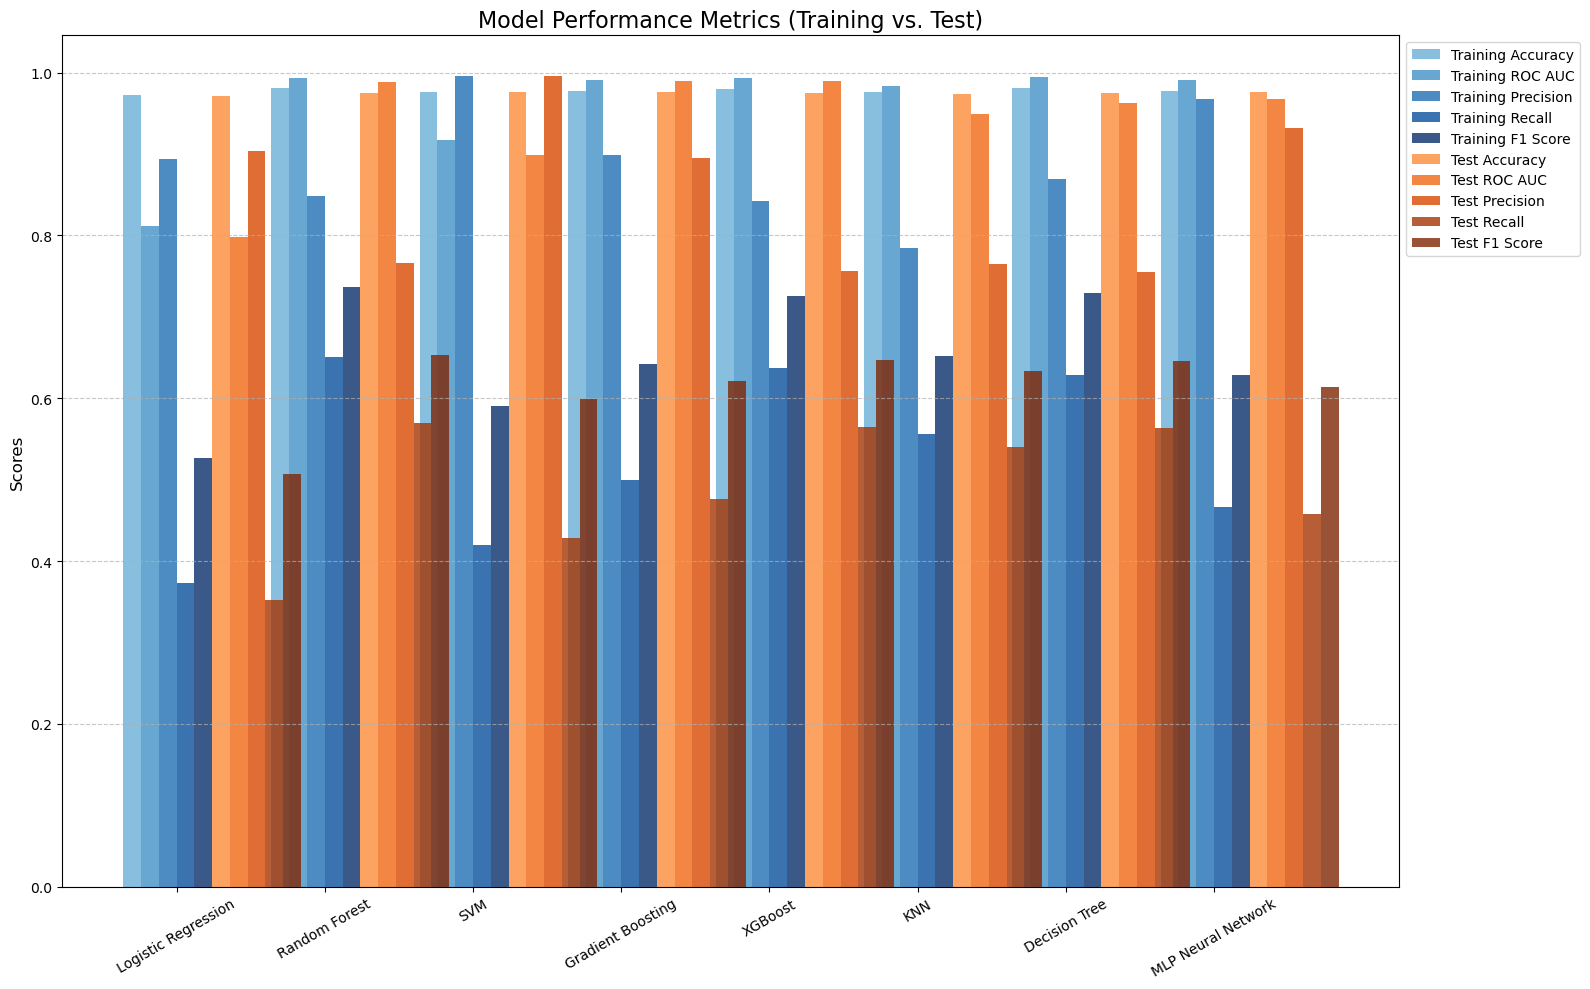

In [208]:
# Define colors for training and test metrics
colors_training = plt.cm.Blues(np.linspace(0.5, 1, 5))  # Lighter to darker blue for training metrics
colors_test = plt.cm.Oranges(np.linspace(0.5, 1, 5))  # Lighter to darker orange for test metrics

# Expand figure size for better readability
plt.figure(figsize=(16, 10))

# Define bar width and positions for each metric
width = 0.12
x = np.arange(len(df_metrics["Model"]))  # One position for each model

# Plot training metrics with their respective colors
plt.bar(x - 2.5 * width, df_metrics["Training Accuracy"], width, label="Training Accuracy", color=colors_training[0], alpha=0.8)
plt.bar(x - 1.5 * width, df_metrics["Training ROC AUC"], width, label="Training ROC AUC", color=colors_training[1], alpha=0.8)
plt.bar(x - 0.5 * width, df_metrics["Training Precision"], width, label="Training Precision", color=colors_training[2], alpha=0.8)
plt.bar(x + 0.5 * width, df_metrics["Training Recall"], width, label="Training Recall", color=colors_training[3], alpha=0.8)
plt.bar(x + 1.5 * width, df_metrics["Training F1 Score"], width, label="Training F1 Score", color=colors_training[4], alpha=0.8)

# Plot test metrics with their respective colors
plt.bar(x + 2.5 * width, df_metrics["Test Accuracy"], width, label="Test Accuracy", color=colors_test[0], alpha=0.8)
plt.bar(x + 3.5 * width, df_metrics["Test ROC AUC"], width, label="Test ROC AUC", color=colors_test[1], alpha=0.8)
plt.bar(x + 4.5 * width, df_metrics["Test Precision"], width, label="Test Precision", color=colors_test[2], alpha=0.8)
plt.bar(x + 5.5 * width, df_metrics["Test Recall"], width, label="Test Recall", color=colors_test[3], alpha=0.8)
plt.bar(x + 6.5 * width, df_metrics["Test F1 Score"], width, label="Test F1 Score", color=colors_test[4], alpha=0.8)

# Add labels, title, and legend
plt.ylabel('Scores', fontsize=12)
plt.title('Model Performance Metrics (Training vs. Test)', fontsize=16)
plt.xticks(x, df_metrics["Model"], rotation=30, fontsize=10)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Appendix

Test Size: 0.1
  Logistic Regression - Accuracy: 0.968473663975394
  Logistic Regression - ROC AUC Score: 0.8415338708653419
  Logistic Regression - Precision: 0.9444444444444444
  Logistic Regression - Recall: 0.2982456140350877
  Logistic Regression - F1 Score: 0.4533333333333333
--------------------------------------------------
Test Size: 0.15
  Logistic Regression - Accuracy: 0.9710404920553563
  Logistic Regression - ROC AUC Score: 0.8379913283482754
  Logistic Regression - Precision: 0.9322033898305084
  Logistic Regression - Recall: 0.3353658536585366
  Logistic Regression - F1 Score: 0.49327354260089684
--------------------------------------------------
Test Size: 0.2
  Logistic Regression - Accuracy: 0.9694348327566321
  Logistic Regression - ROC AUC Score: 0.8281882758773029
  Logistic Regression - Precision: 0.8554216867469879
  Logistic Regression - Recall: 0.3256880733944954
  Logistic Regression - F1 Score: 0.4717607973421927
---------------------------------------------

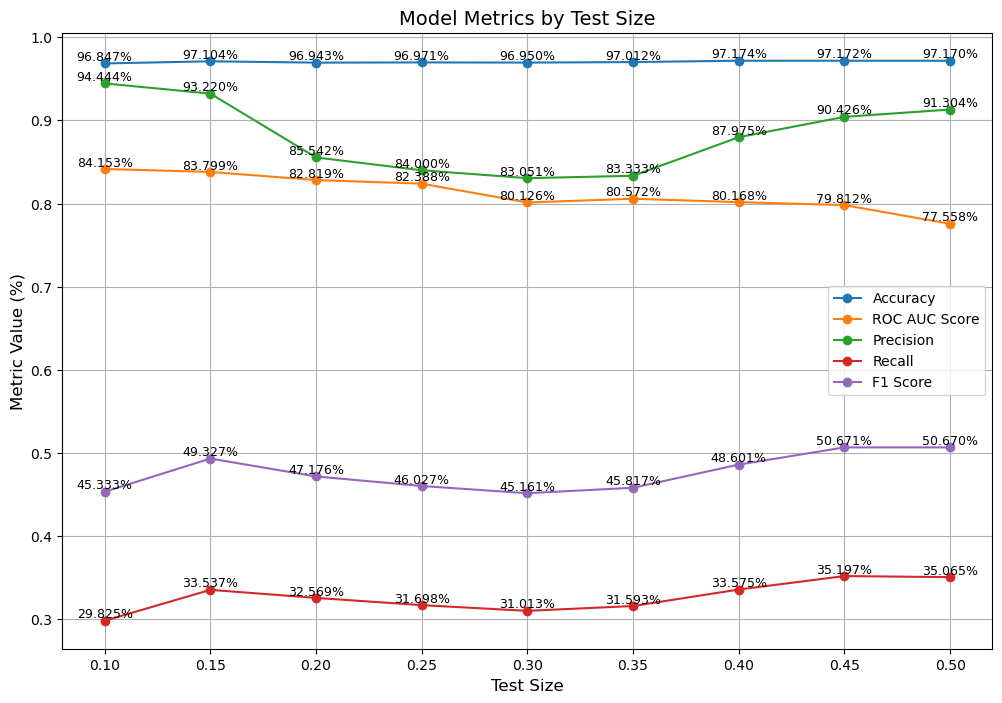

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Load the datasets
df = pd.read_csv('MavenRail.csv')

# Drop duplicates and specific rows
df = df.drop_duplicates()
rows = [23613, 23614, 23616, 23618, 23624]
df = df.drop(index=rows)

# Drop rows where the target variable 'Refund.Request' is NaN
df = df.dropna(subset=['Refund.Request'])

# Map categorical values to numerical for model compatibility
df['Journey.Status'] = df['Journey.Status'].map({'On Time': 1, 'Delayed': 0})
df['Payment.Method'] = df['Payment.Method'].map({'Debit Card': 1, 'Credit Card': 0})
df['Reason.for.Delay'] = df['Reason.for.Delay'].apply(lambda x: 1 if x == 'Technical Issue' else 0)
df['Ticket.Type'] = df['Ticket.Type'].map({'Advance': 0, 'Off-Peak': 1, 'Anytime': 2})

# One-hot encode Departure.Station and Arrival.Station
df = pd.get_dummies(df, columns=['Departure.Station', 'Arrival.Station'], drop_first=True)

# Define features and target, including one-hot encoded station columns
features = ['Journey.Status', 'Payment.Method', 'Reason.for.Delay', 'Ticket.Type'] + \
           [col for col in df.columns if 'Departure.Station_' in col or 'Arrival.Station_' in col]
X = df[features]
y = df['Refund.Request'].map({'Yes': 1, 'No': 0})

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Initialize lists to store the metrics
accuracies = []
roc_aucs = []
precisions = []
recalls = []
f1_scores = []
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# Iterate through each test size, split the data, train the model, and evaluate metrics
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Train Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Predictions
    y_pred_log = log_reg.predict(X_test)

    # Calculate accuracy and ROC AUC score
    log_accuracy = accuracy_score(y_test, y_pred_log)
    log_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

    # Calculate additional metrics: precision, recall, and F1 score
    log_precision = precision_score(y_test, y_pred_log)
    log_recall = recall_score(y_test, y_pred_log)
    log_f1 = f1_score(y_test, y_pred_log)
    
    # Append metrics to lists
    accuracies.append(log_accuracy)
    roc_aucs.append(log_roc_auc)
    precisions.append(log_precision)
    recalls.append(log_recall)
    f1_scores.append(log_f1)

    # Print the results
    print(f"Test Size: {test_size}")
    print("  Logistic Regression - Accuracy:", log_accuracy)
    print("  Logistic Regression - ROC AUC Score:", log_roc_auc)
    print("  Logistic Regression - Precision:", log_precision)
    print("  Logistic Regression - Recall:", log_recall)
    print("  Logistic Regression - F1 Score:", log_f1)
    print("-" * 50)
    
metrics_data = {
    "Test Size": test_sizes,
    "Accuracy": accuracies,
    "ROC AUC": roc_aucs,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
}

# Create a line plot for each metric
plt.figure(figsize=(12, 8))

# Plot and annotate Accuracy
plt.plot(test_sizes, accuracies, marker='o', label='Accuracy')
for x, y in zip(test_sizes, accuracies):
    plt.text(x, y, f"{y*100:.3f}%", fontsize=9, ha='center', va='bottom')

# Plot and annotate ROC AUC
plt.plot(test_sizes, roc_aucs, marker='o', label='ROC AUC Score')
for x, y in zip(test_sizes, roc_aucs):
    plt.text(x, y, f"{y*100:.3f}%", fontsize=9, ha='center', va='bottom')

# Plot and annotate Precision
plt.plot(test_sizes, precisions, marker='o', label='Precision')
for x, y in zip(test_sizes, precisions):
    plt.text(x, y, f"{y*100:.3f}%", fontsize=9, ha='center', va='bottom')

# Plot and annotate Recall
plt.plot(test_sizes, recalls, marker='o', label='Recall')
for x, y in zip(test_sizes, recalls):
    plt.text(x, y, f"{y*100:.3f}%", fontsize=9, ha='center', va='bottom')

# Plot and annotate F1 Score
plt.plot(test_sizes, f1_scores, marker='o', label='F1 Score')
for x, y in zip(test_sizes, f1_scores):
    plt.text(x, y, f"{y*100:.3f}%", fontsize=9, ha='center', va='bottom')
    
# Add labels, title, and legend
plt.xlabel('Test Size', fontsize=12)
plt.ylabel('Metric Value (%)', fontsize=12)
plt.title('Model Metrics by Test Size', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()